In [7]:
import os
import cv2

# Input dataset path
dataset_path = r"H:\Final Dataset"

# Output path for preprocessed images
output_path = r"H:\preprocced_data_without_split"

# Image size
IMG_SIZE = (128, 128)

# Create output directory
os.makedirs(output_path, exist_ok=True)

# Define image preprocessing function
def preprocess_image(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image file not found or could not be read: {image_path}")

        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        equalized = cv2.equalizeHist(gray)
        gaussian_filtered = cv2.GaussianBlur(equalized, (5, 5), 0)
        resized_image = cv2.resize(gaussian_filtered, IMG_SIZE)
        return resized_image
    except Exception as e:
        print(f"Error processing {image_path}: {str(e)}")
        return None

# Iterate through each folder (class) in the dataset directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        # Create output directory for this class
        output_class_path = os.path.join(output_path, class_name)
        os.makedirs(output_class_path, exist_ok=True)

        # Process each image in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):
                # Preprocess the image
                preprocessed_image = preprocess_image(image_path)

                if preprocessed_image is not None:
                    # Save preprocessed image to output directory
                    output_image_path = os.path.join(output_class_path, image_name)
                    cv2.imwrite(output_image_path, preprocessed_image)
                    print(f"Processed: {image_path} -> {output_image_path}")


Processed: H:\Final Dataset\cow_1\cow_1_1.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_1.jpg
Processed: H:\Final Dataset\cow_1\cow_1_10.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_10.jpg
Processed: H:\Final Dataset\cow_1\cow_1_11.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_11.jpg
Processed: H:\Final Dataset\cow_1\cow_1_12.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_12.jpg
Processed: H:\Final Dataset\cow_1\cow_1_13.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_13.jpg
Processed: H:\Final Dataset\cow_1\cow_1_14.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_14.jpg
Processed: H:\Final Dataset\cow_1\cow_1_15.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_15.jpg
Processed: H:\Final Dataset\cow_1\cow_1_16.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_16.jpg
Processed: H:\Final Dataset\cow_1\cow_1_2.jpg -> H:\preprocced_data_without_split\cow_1\cow_1_2.jpg
Processed: H:\Final Dataset\cow_1\cow_1_3.jpg -> H:\preprocced_data_without_split\cow_

In [9]:
import os
import cv2
import numpy as np
import random


In [10]:
input_path = r"H:\preprocced_data_without_split"
output_augmented_path = r"H:\preprocced_data_without_split_augmented"


In [11]:
def horizontal_flip(image):
    return cv2.flip(image, 1)

def vertical_flip(image):
    return cv2.flip(image, 0)

def random_brightness(image, min_factor=0.7, max_factor=1.3):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    random_bright = np.random.uniform(min_factor, max_factor)
    hsv[:,:,2] = np.clip(hsv[:,:,2] * random_bright, 0, 255).astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

def rotate_90(image):
    return np.rot90(image)

def rotate_180(image):
    return np.rot90(image, 2)

def rotate_270(image):
    return np.rot90(image, 3)


In [12]:
def augment_images(input_dir, output_dir, class_name, augment_factor=5):
    # Create output directory for this class
    output_class_path = os.path.join(output_dir, class_name)
    os.makedirs(output_class_path, exist_ok=True)

    # Iterate through each image in the class directory
    for image_name in os.listdir(input_dir):
        image_path = os.path.join(input_dir, image_name)
        if os.path.isfile(image_path):
            # Load image
            image = cv2.imread(image_path)

            augmented_images = []
            augmented_images.append(image)  # Original image

            # Apply flips and brightness adjustments randomly
            for _ in range(augment_factor):
                augmented = image.copy()
                # Randomly apply flips and brightness adjustments
                if random.random() < 0.5:
                    augmented = horizontal_flip(augmented)
                if random.random() < 0.5:
                    augmented = vertical_flip(augmented)
                if random.random() < 0.5:
                    augmented = random_brightness(augmented)

                augmented_images.append(augmented)

            # Save augmented images
            base_name = os.path.splitext(image_name)[0]
            for idx, augmented_image in enumerate(augmented_images):
                output_name = f"{base_name}_aug{idx}.jpg"
                output_path = os.path.join(output_class_path, output_name)
                cv2.imwrite(output_path, augmented_image)


In [13]:
# Iterate through each folder (class) in the input_path directory
for class_name in os.listdir(input_path):
    class_dir = os.path.join(input_path, class_name)
    if os.path.isdir(class_dir):
        augment_images(class_dir, output_augmented_path, class_name)
        print(f"Augmented images for class: {class_name}")


Augmented images for class: cow_1
Augmented images for class: cow_10
Augmented images for class: cow_101
Augmented images for class: cow_110
Augmented images for class: cow_112
Augmented images for class: cow_113
Augmented images for class: cow_124
Augmented images for class: cow_126
Augmented images for class: cow_127
Augmented images for class: cow_129
Augmented images for class: cow_13
Augmented images for class: cow_140
Augmented images for class: cow_157
Augmented images for class: cow_158
Augmented images for class: cow_168
Augmented images for class: cow_17
Augmented images for class: cow_179
Augmented images for class: cow_190
Augmented images for class: cow_196
Augmented images for class: cow_2
Augmented images for class: cow_201
Augmented images for class: cow_210
Augmented images for class: cow_212
Augmented images for class: cow_217
Augmented images for class: cow_223
Augmented images for class: cow_224
Augmented images for class: cow_235
Augmented images for class: cow_24


In [2]:
import os
import shutil
import random


augmented_data_path = r"H:\preprocced_data_without_split_augmented"
output_path = r"H:\preprocced_data_with_augmented_splitted"
train_path = os.path.join(output_path, 'train')
test_path = os.path.join(output_path, 'test')
val_path = os.path.join(output_path, 'val')

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)


In [15]:
def split_and_save_data(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through each folder (class) in the input directory
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)
        if os.path.isdir(class_dir):
            # Create directories for train, test, and validation
            train_class_dir = os.path.join(output_dir, 'train', class_name)
            test_class_dir = os.path.join(output_dir, 'test', class_name)
            val_class_dir = os.path.join(output_dir, 'val', class_name)
            os.makedirs(train_class_dir, exist_ok=True)
            os.makedirs(test_class_dir, exist_ok=True)
            os.makedirs(val_class_dir, exist_ok=True)

            # List all files in the current class directory
            files = os.listdir(class_dir)
            random.shuffle(files)

            # Calculate split sizes
            num_files = len(files)
            num_train = int(num_files * 0.7)
            num_test = int(num_files * 0.15)
            num_val = num_files - num_train - num_test

            # Split files into train, test, and validation sets
            train_files = files[:num_train]
            test_files = files[num_train:num_train + num_test]
            val_files = files[num_train + num_test:]

            # Copy files to respective directories
            for file in train_files:
                shutil.copy(os.path.join(class_dir, file), os.path.join(train_class_dir, file))
            for file in test_files:
                shutil.copy(os.path.join(class_dir, file), os.path.join(test_class_dir, file))
            for file in val_files:
                shutil.copy(os.path.join(class_dir, file), os.path.join(val_class_dir, file))


In [16]:
# Split and save data for each class
split_and_save_data(augmented_data_path, output_path)


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [2]:
train_path = r"H:\preprocced_data_with_augmented_splitted\train"
test_path = r"H:\preprocced_data_with_augmented_splitted\test"
val_path = r"H:\preprocced_data_with_augmented_splitted\val"
IMG_SIZE = (128, 128)  # Image size as per your preprocessing


In [3]:
def load_data_from_directory(path):
    X = []
    y = []
    class_dirs = os.listdir(path)
    label_encoder = {class_name: idx for idx, class_name in enumerate(class_dirs)}

    for class_dir in class_dirs:
        class_path = os.path.join(path, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMG_SIZE)
            X.append(img)
            y.append(label_encoder[class_dir])

    X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
    y = np.array(y)
    return X, y

X_train, y_train = load_data_from_directory(train_path)
X_test, y_test = load_data_from_directory(test_path)
X_val, y_val = load_data_from_directory(val_path)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

# Convert labels to categorical
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [6]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
273/273 [==============================] - 10s 15ms/step - loss: 3.8579 - accuracy: 0.1366 - val_loss: 2.0267 - val_accuracy: 0.5933
Epoch 2/50
273/273 [==============================] - 4s 13ms/step - loss: 1.6390 - accuracy: 0.5593 - val_loss: 0.4422 - val_accuracy: 0.9016
Epoch 3/50
273/273 [==============================] - 4s 13ms/step - loss: 0.8528 - accuracy: 0.7477 - val_loss: 0.2146 - val_accuracy: 0.9533
Epoch 4/50
273/273 [==============================] - 4s 13ms/step - loss: 0.5588 - accuracy: 0.8292 - val_loss: 0.1198 - val_accuracy: 0.9731
Epoch 5/50
273/273 [==============================] - 4s 13ms/step - loss: 0.4317 - accuracy: 0.8665 - val_loss: 0.0949 - val_accuracy: 0.9757
Epoch 6/50
273/273 [==============================] - 4s 13ms/step - loss: 0.3415 - accuracy: 0.8921 - val_loss: 0.0897 - val_accuracy: 0.9777
Epoch 7/50
273/273 [==============================] - 4s 13ms/step - loss: 0.3023 - accuracy: 0.9038 - val_loss: 0.0834 - val_accuracy: 0.979

In [7]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


58/58 [==============================] - 0s 5ms/step - loss: 0.0366 - accuracy: 0.9902
Test Accuracy: 0.9902014136314392


In [8]:
model_save_path = r"H:\model\cow_identifier_model.h5"
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
model.save(model_save_path)


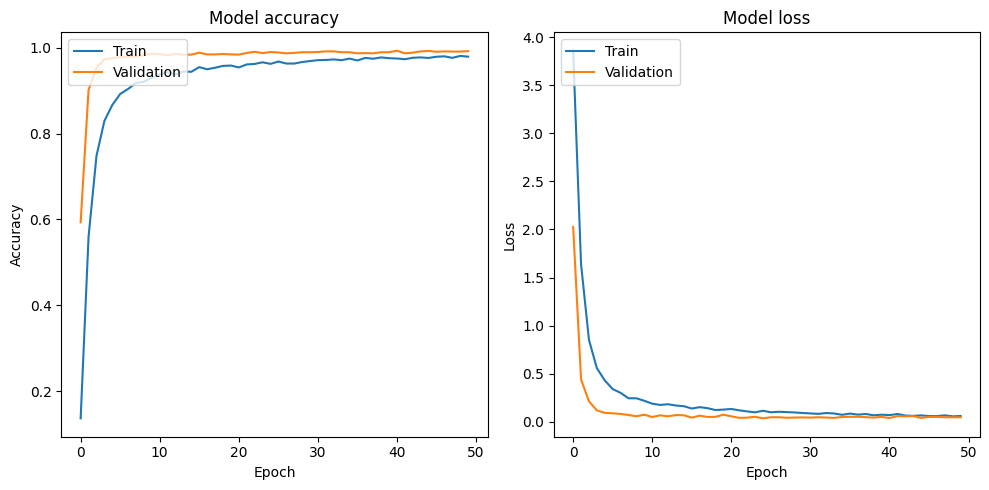

In [9]:
plt.figure(figsize=(10, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix

# Define paths and parameters
test_path = r"H:\preprocced_data_with_augmented_splitted\test"
IMG_SIZE = (128, 128)  # Image size as per your preprocessing

# Load the trained model
model_path = r"H:\model\cow_identifier_model.h5"
model = load_model(model_path)

# Function to load and preprocess data from directory
def load_data_from_directory(path):
    X = []
    y = []
    class_dirs = os.listdir(path)
    label_encoder = {class_name: idx for idx, class_name in enumerate(class_dirs)}

    for class_dir in class_dirs:
        class_path = os.path.join(path, class_dir)
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, IMG_SIZE)
            X.append(img)
            y.append(label_encoder[class_dir])

    X = np.array(X).reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)
    y = np.array(y)
    return X, y, label_encoder

# Load test data
X_test, y_test, label_encoder = load_data_from_directory(test_path)

# Normalize pixel values to be between 0 and 1
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical
num_classes = len(label_encoder)
y_test_categorical = to_categorical(y_test, num_classes)

# Predict the labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Generate the classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.keys())

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


58/58 [==============================] - 1s 8ms/step
Confusion Matrix:
[[14  0  0 ...  0  0  0]
 [ 0 25  0 ...  0  0  0]
 [ 0  0 10 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0 12]]

Classification Report:
              precision    recall  f1-score   support

       cow_1       1.00      1.00      1.00        14
      cow_10       1.00      1.00      1.00        25
     cow_101       1.00      1.00      1.00        10
     cow_110       1.00      1.00      1.00         8
     cow_112       1.00      1.00      1.00        21
     cow_113       1.00      1.00      1.00        21
     cow_124       0.90      1.00      0.95        18
     cow_126       1.00      1.00      1.00        18
     cow_127       1.00      1.00      1.00        27
     cow_129       1.00      1.00      1.00        11
      cow_13       1.00      1.00      1.00        25
     cow_140       1.00      0.92      0.96        12
     cow_157       0.93      1.00      0.97   

In [14]:
def identify_cow(image_path, model, label_encoder):
    image = preprocess_image(image_path)
    image = image / 255.0
    image = np.expand_dims(image, axis=(0, -1))
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions)
    cow_id = list(label_encoder.keys())[list(label_encoder.values()).index(predicted_label)]
    return cow_id

# Load the model
model = tf.keras.models.load_model(os.path.join(processed_data_path, 'cow_identifier_model.h5'))

# Example usage
new_image_path = r"F:\Thesis\Final Dataset\cow_343\cow_343_11.jpg"  # Replace with the path to the new image
identified_cow = identify_cow(new_image_path, model, label_encoder)
print(f'The identified cow is: {identified_cow}')


NameError: name 'preprocess_image' is not defined